<div style="text-align:center">
    
# ‘wikiHow’: NLP-Based Text Summarization and Semantic Analysis 

### Mt. SAC CISB 63 Final Project Fall 2023

#### By
    
#### Paul Sandeen
    
</div>

## Introduction

A wiki (pronounced “WIK-ee”) is an Internet website containing information created and maintained by its readership community. The website wikiHow is a knowledge base that contains “how-to” information on a wide variety of topics including Hobbies and Crafts, Pets and Animals, Philosophy and Religion, Relationships, and Health. The goal of wikiHow is to allow readers to acquire new skills by reading articles with step-by-step illustrated instructions on how to perform various tasks related to topic categories.

The wikiHow Dataset is a large collection of articles from the wikiHow knowledge base saved in a Comma-Separated Value (.csv) file format. There are three columns in the CSV file:

- Title: The title of the article on wikiHow.
- Headline: The summary of the steps in the step-by-step description.
- Text: The body of the article containing step-by-step directions.

This project will use Natural Language Processing (NLP) techniques to analyze the articles in the wikiHow Dataset to identify related topics and provide summarization of the articles.



## Intended Audience

This project will benefit anyone with an interest in NLP techniques for text summarization and topic identification. Proficiency with the Python programming language is required. Familiarity with the basic concepts of text summarization and topic identification is assumed.

## Materiels and Methods

This project uses the Python programming language running in the Anaconda environment. 

Associated Python data science libraries: Numpy, pandas, Matplotlib, Seaborn.

Associated Python NLP libraries: scikit-learn, NLTK, Word2Vec, Seq2Seq, LDA, TF-DFI, spaCy

The project was composed as a Jupyter Notebook.


## Data Source

The single data file used for the project is:

* wikihowAll.csv

File size: ~605 MB

The data file can be downloaded from:

https://github.com/mahnazkoupaee/WikiHow-Dataset

The text in the articles is released under the Creative Commons License (CC-BY-NC-SA).


## Acquire the Necessary Software Packages

In [1]:
# Import the Python Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import ast

In [2]:
# Import the Python scikit-learn libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification

In [3]:
# Import the Python NLP libraries

from textblob import TextBlob

import tensorflow as tf

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

import re

from datetime import date
from datetime import datetime

from wordcloud import WordCloud

import spacy
from spacy import displacy

from gensim import corpora, models
import gensim.downloader as api

from string import punctuation

import transformers
from transformers import pipeline

from tqdm import tqdm
from gensim.models import Word2Vec 
import umap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
# Disbable Jupyter notebook warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Download the NLTK databases
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load the Textual Data

In [6]:
# Load the articles into a pandas DataFrame
articles_df = pd.read_csv("data/wikihowAll.csv")

## Exploratory Data Analysis (EDA)

#### Display the head of the DataFrame

In [7]:
# User complaints dictionary
articles_df.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


<b>Note</b>: The columns 'headline' and 'title' should be swapped to get the 'title' > 'headline' > 'text' order.

In [8]:
# Swap the positions of the 'headline' and 'title' columns
move_column = articles_df.pop('title')
articles_df.insert(0, 'title', move_column)
articles_df.head()

,title,headline,text
0,How to Be an Organized Artist1,"\nKeep related supplies in the same area.,\nMa...","If you're a photographer, keep all the necess..."
1,How to Create a Neopoprealist Art Work,\nCreate a sketch in the NeoPopRealist manner ...,See the image for how this drawing develops s...
2,How to Be a Visual Effects Artist1,"\nGet a bachelor’s degree.,\nEnroll in a studi...",It is possible to become a VFX artist without...
3,How to Become an Art Investor,\nStart with some experience or interest in ar...,The best art investors do their research on t...
4,How to Be an Organized Artist2,"\nKeep your reference materials, sketches, art...","As you start planning for a project or work, ..."


#### Discribe the contents of the DataFrame

In [9]:
# Describe the DataFrame
articles_df.describe

<bound method NDFrame.describe of                                          title  \
0               How to Be an Organized Artist1   
1       How to Create a Neopoprealist Art Work   
2           How to Be a Visual Effects Artist1   
3                How to Become an Art Investor   
4               How to Be an Organized Artist2   
...                                        ...   
215360               How to Pick a Stage Name3   
215361               How to Pick a Stage Name4   
215362                 How to Identify Prints1   
215363                 How to Identify Prints2   
215364                 How to Identify Prints3   

                                                 headline  \
0       \nKeep related supplies in the same area.,\nMa...   
1       \nCreate a sketch in the NeoPopRealist manner ...   
2       \nGet a bachelor’s degree.,\nEnroll in a studi...   
3       \nStart with some experience or interest in ar...   
4       \nKeep your reference materials, sketches, art...   

#### Display the info for the DataFrame

In [10]:
# Display the DataFram info
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215365 entries, 0 to 215364
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     215364 non-null  object
 1   headline  214547 non-null  object
 2   text      214294 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


#### Display the 'title', 'headline', and 'text' of the first article

In [11]:
# Display the first article 'title'
articles_df.title[0]

'How to Be an Organized Artist1'

In [12]:
# Display the first article 'headline'
articles_df.headline[0]

'\nKeep related supplies in the same area.,\nMake an effort to clean a dedicated workspace after every session.,\nPlace loose supplies in large, clearly visible containers.,\nUse clotheslines and clips to hang sketches, photos, and reference material.,\nUse every inch of the room for storage, especially vertical space.,\nUse chalkboard paint to make space for drafting ideas right on the walls.,\nPurchase a label maker to make your organization strategy semi-permanent.,\nMake a habit of throwing out old, excess, or useless stuff each month.'

In [13]:
# Display the first article 'text'
articles_df.text[0]

" If you're a photographer, keep all the necessary lens, cords, and batteries in the same quadrant of your home or studio. Paints should be kept with brushes, cleaner, and canvas, print supplies should be by the ink, etc. Make broader groups and areas for your supplies to make finding them easier, limiting your search to a much smaller area. Some ideas include:\n\n\nEssential supplies area -- the things you use every day.\nInspiration and reference area.\nDedicated work area .\nInfrequent or secondary supplies area, tucked out of the way.;\n, This doesn't mean cleaning the entire studio, it just means keeping the area immediately around the desk, easel, pottery wheel, etc. clean each night. Discard trash or unnecessary materials and wipe down dirty surfaces. Endeavor to leave the workspace in a way that you can sit down the next day and start working immediately, without having to do any work or tidying.\n\n\nEven if the rest of your studio is a bit disorganized, an organized workspace

<b>Result</b>: There are 215,364 articles in the DataFrame. All the data is text and there is no missing data.

The 'headline' provides a summary of each step that is detailed in the article 'text'. The article 'text' is ideal for summarization and comparison with the article 'headline'.

## Apply NLP Techniques

### Part 1: Gensim and Topic Modeling

The Gensim library can be used to analyze the ‘text’ column in order perform  the following:

* tokenization (create tokens from the individual words)
* create a dictionary from the tokens
* create a Bag of Words (BOW) representation
* use Latent Dirichlet Allocation (LDA) for topic modeling.


In [14]:
# Define the stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Define the input string as the text from the first article
input_string = articles_df.at[0, 'text']

# Tokenize the input string into lower case words
words = word_tokenize(input_string.lower())

# Remove stopwords and punctuation
filtered_words = [word for word in words if word not in stop_words and word not in punctuation]


#### Create a Gensim Dictionary

In [15]:
# Create a Gensim dictionary from filtered_words
dictionary = corpora.Dictionary([filtered_words])

# Convert the filtered_words into Python list of tokens for doc2bow
filtered_tokens = [filtered_words]


#### Create a Gensim corpus using Bag of Words (BOW)

In [16]:
# Create the Gensim corpus using Bag of Words (BOW)
corpus = [dictionary.doc2bow(tokens) for tokens in filtered_tokens]

# Print the tokens and their IDs in the dictionary
print("Tokens and their IDs:")
print(dictionary.token2id)

Tokens and their IDs:
{"'ll": 0, "'re": 1, "'s": 2, '--': 3, '30': 4, 'across': 5, 'afraid': 6, 'afternoon': 7, 'allowing': 8, 'along': 9, 'also': 10, 'area': 11, 'areas': 12, 'around': 13, 'art': 14, 'art.': 15, 'artist': 16, 'artists': 17, 'aside': 18, 'away': 19, 'back': 20, 'batteries': 21, 'best': 22, 'beyond': 23, 'bit': 24, 'bottles': 25, 'broader': 26, 'brushes': 27, 'business': 28, 'canvas': 29, 'ceiling': 30, 'chalk': 31, 'chalkboard': 32, 'chance': 33, 'change': 34, 'cheap': 35, 'clean': 36, 'cleaner': 37, 'cleaning': 38, 'clear': 39, 'clutter': 40, 'comes': 41, 'constantly': 42, 'cords': 43, 'cups': 44, 'cut': 45, 'day': 46, 'declutter': 47, 'dedicated': 48, 'desire': 49, 'desk': 50, 'digging': 51, 'dirty': 52, 'discard': 53, 'disorganization': 54, 'disorganized': 55, 'door': 56, 'drawers': 57, 'easel': 58, 'easier': 59, 'easy': 60, 'effect': 61, 'either': 62, 'endeavor': 63, 'energy': 64, 'entire': 65, 'equipment': 66, 'especially': 67, 'essential': 68, 'etc': 69, 'etc.': 

#### Create a Latent Dirichlet Allocation (LDA) Model for Topic Modeling

In [17]:
# Create the LDA model for topic modeling
lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary, passes=15)

In [18]:
# Display the LDA topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.012*"n't" + 0.012*"area" + 0.012*"supplies" + 0.010*"space" + 0.010*"studio" + 0.010*"things" + 0.008*"keep" + 0.008*"use" + 0.008*"ideas" + 0.008*"way"



#### Compare to the LDA topics to human-generated subject headlines

In [19]:
# Print the article headline
articles_df['headline'][0]

'\nKeep related supplies in the same area.,\nMake an effort to clean a dedicated workspace after every session.,\nPlace loose supplies in large, clearly visible containers.,\nUse clotheslines and clips to hang sketches, photos, and reference material.,\nUse every inch of the room for storage, especially vertical space.,\nUse chalkboard paint to make space for drafting ideas right on the walls.,\nPurchase a label maker to make your organization strategy semi-permanent.,\nMake a habit of throwing out old, excess, or useless stuff each month.'

<b>Result Interpretation</b>: Many of the words from the LDA model of the text body appear in the human-generated article headline (‘supplies’, ‘area’, ‘space’, ‘ideas’).

### Part 2: Named Entity Recognition (NER) to View Entities

The purpose of Named Entity Recognition (NER) is to identify named entities in a body of text, such as:

* Organizations
* Dates
* Locations
* People
  
This section will compare the NER results visually using spaCy for article text with the section headlines visually to see the similarities between the two.


#### Prepare spaCy and load the text

In [20]:
# Configure the spaCy library for text rendering
nlp = spacy.load('en_core_web_sm')

In [21]:
# Load the first article 'text' and process it for spaCy
doc_text = nlp(articles_df.at[0, 'text'])

# Render the output text with named entities highlighted
displacy.render(doc_text, style='ent', jupyter=True)


In [22]:
# Load the first article 'headline' and process it for spaCy
doc_text = nlp(articles_df.at[0, 'headline'])

# Render the output text with named entities highlighted
displacy.render(doc_text, style='ent', jupyter=True)

<b>Result Interpretation</b>: NER tagging was not helpful in comparing the contents of the article text with the article summary headlines. The article headlines were too general and did not contain specific information related to the article text to associate meaning between the two.

### Part 3: Hugging Face Transformers and Text Summarization

Hugging Face is an Python library for a type of deep learning models called transformers that can be used for tokenization and text summarization.

Hugging Face provides:

* A wide selection of pre-trained models
* The transformers library, a series of APIs to work with text
* Tokenizers to break up large bodies of text into single words
* Pipelines to process text without writing substantial code

#### Create a text classification pipeline using a pre-trained model

In [23]:
# Use the first article 'text' to be summarized
text = articles_df.at[0, 'text']

#### Create the text summarization pipeline using the t5-base (Text-To-Text Transfer Transformer) pre-trained model

In [24]:
# Create the summarization pipline
nlp = pipeline(task='summarization', model='t5-base')

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


#### Perform the text summarization of the input text

In [25]:
# Text summarization with a max length of 100 characters and a min length of 30 characters
summarized_text = nlp(text, max_length=100, min_length=30)

# Print the summarized text
summarized_text[0]['summary_text']

Token indices sequence length is longer than the specified maximum sequence length for this model (813 > 512). Running this sequence through the model will result in indexing errors


"if you're a photographer, keep all the necessary supplies in the same quadrant of your home or studio . make broader groups and areas for your supplies to make finding them easier . an organized workspace will help you get down to business every time you want to make art ."

In [26]:
# Print the length of the original text and summary text
print(f"Length of original text: {len(text)}")
print(f"Length of summary text: {len(summarized_text[0]['summary_text'])}")
print(f"Length of human-generated article headline: {len(articles_df.at[0, 'headline'])}")

Length of original text: 3425
Length of summary text: 273
Length of human-generated article headline: 536


<b>Result Interpretation</b>: Note that the original input text length was 3,425 characters, and the summary text was only 329 charactes. The generated summary was actually shorter than the human-generated article headline summaries (536 characters).

Hugging Face did an excellent job of text summariztion. Note that the generic model t5-base was used. Other models are available, such as BART and GPT.

### Part 4: Word2Vec and Semantic Analysis

<b>Goal</b>: Word2Vec will learn representations based on the context on how the words are used. Word2Vec provides the ability to predice a word based on its surrounding words. The prediction works because words of similar meaning are often surrounded by the same words.

Word2Vec offers:
* Word embeddings to represent each word uniquely as a high-dimensional vector
* Vector spaces, where words with similar meanings are located close to each other
* Semantic relationships that can be applied to words that are closely related

#### Build the Word2Vec model

In [27]:
# Capture the article titles
titles = []

# Populate the list of article titles
for title in tqdm(articles_df['title']):
    titles.append(title)

100%|██████████████████████████████████████████████████████████████████████| 215365/215365 [00:00<00:00, 858772.08it/s]


In [28]:
# Tokenize titles into words
tokenized_titles = []
for title in titles:
    try:
        tokens = word_tokenize(title.lower())
    except:
        tokens = ' '
    tokenized_titles.append(tokens)

In [29]:
# Create the Word2Vec model
model = Word2Vec(window=10,          # The max distance between the current word and predicted word
                 sg=1,               # The Skip-gram model used
                 hs=0,               # "Hierarchical Softmax". When hs=0, negative sampling is used instead of hierarchical softmax.
                 negative=10,        # Number of negative samples for each target word during training.
                 alpha=0.03,         # Starting value used to control the learning rate
                 min_alpha=0.0007,   # Final value used to control the learning rate
                 seed=4)             # Defines the random seed for reproducibility.

In [30]:
# Build the Word2Vec model vocabulary
model.build_vocab(tokenized_titles,      # Contains a list of sentences or tokenized text from your corpus.
                  progress_per=200)            # How often progress information should be displayed while building the vocabulary


In [31]:
# Train the model
model.train(tokenized_titles, total_examples=model.corpus_count, epochs=10, report_delay=1)

(8583470, 15324760)

#### Investigate the Word2Vec model

In [32]:
# Print the model parameters
print(model)

Word2Vec<vocab=17116, vector_size=100, alpha=0.03>


In [33]:
# Display the information about the word vectors
X = model.wv[model.wv.key_to_index]
print(f"Shape of X: {len(X)} words x {len(X[0])} dimensions")

Shape of X: 17116 words x 100 dimensions


<b>Result</b>: The vocabulary of the article titles has 17,116 words in 100 dimensions.

#### Visualize the Word2Vec Embeddings

Text(11.722657, 4.798214, 'How to Be an Organized Artist3')

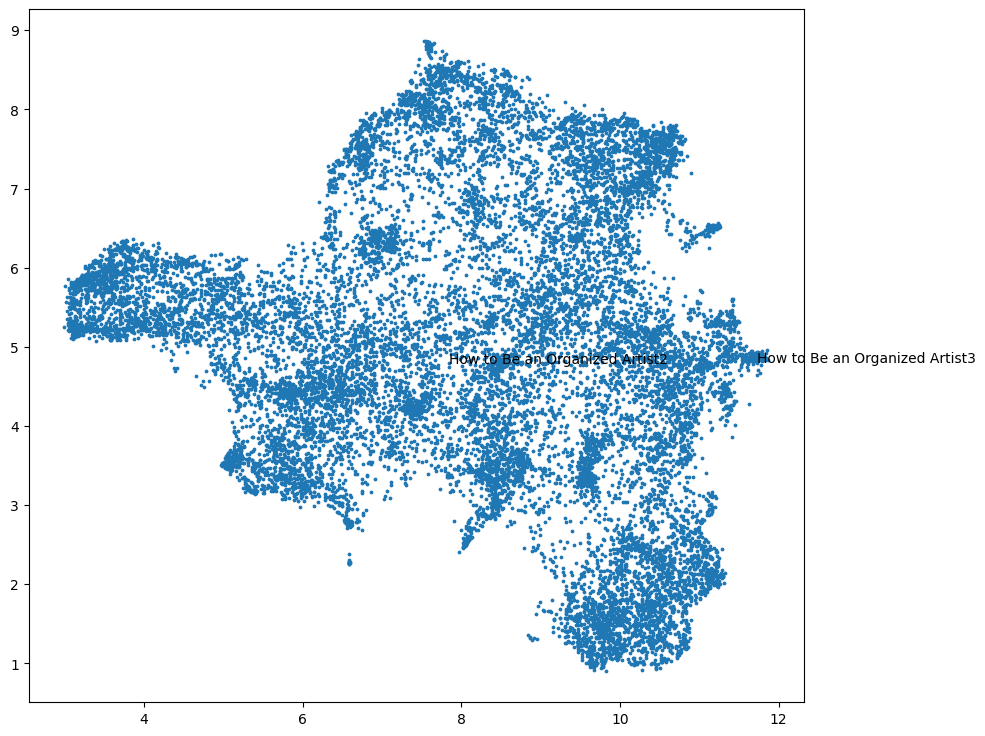

In [34]:
# Calculate cluster_embedding
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

# Create the scatter plot of the cluster embedding
plt.figure(figsize=(10, 9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

# Add a label to the plot
plt.annotate(articles_df['title'][4], (cluster_embedding[4, 0], cluster_embedding[4, 1]))
plt.annotate(articles_df['title'][5], (cluster_embedding[5, 0], cluster_embedding[5, 1]))

In [35]:
# Display the fourth and fifth article 'title'
print(articles_df['title'][4])
print(articles_df['title'][5])

How to Be an Organized Artist2
How to Be an Organized Artist3


<b>Plot Interpretation</b>: The plot represents a t-Distributed Stochastic Neighbor Embedding (t-SNE) visualization of the word vectors reduced to two-dimensional space, showing word clusters based on the word vectors created by Word2Vec.

Note: Each word is represented by a point on the graph. Words close together have similar meanings in the 100-dimension space. 

The fourth article title “How to Be an Organized Artist2” and the fifth article title “How to Be an Organized Artist3” are close to each other, separated by the difference between ‘Artist2’ and ‘Artist3’.


### Part 5: Non-Negative Matrix Factorization (NMF) for Topic Modeling

NMF is an NLP technique for topic modeling and feature extraction. NMF offers:

* Unsupervised learning to extract topics from large text documents
* Feature extraction and text classification by identifying features that can be removed
* Text summarization by identifying the underlying sturcture of a document by finding key terms

#### Create the TF-IDF matrix

In [36]:
# Replace 'nan' values in the DataFrame with an empty space
df = pd.DataFrame(articles_df['title'].fillna(''))
df.head(5)

# Create the TF-IDF matrix vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['title'])

#### Use NMF to create the topics and build the model

In [37]:
# Create the number of topics
num_topics = 15

# Create the model
nmf_model = NMF(n_components=num_topics, init='random', random_state=42)

# Build the matrix
nfm_matrix = nmf_model.fit_transform(tfidf_matrix)

In [38]:
# Display the topics and the top words in each topic
feature_names = vectorizer.get_feature_names_out()

# This loop iterates over each topic extracted by NMF.
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_indices]
    # The join method is used to concatenate the words into a single string, separated by commas.
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: draw, cartoon, 3d, anime, manga, using, face, dog, cat, little
Topic #2: use, google, android, windows, leftover, twitter, microsoft, facebook, iphone, oil
Topic #3: write, letter, good, essay, book, paper, story, plan, resume, business
Topic #4: rid, acne, skin, dog, treat, cold, dry, home, bad, using
Topic #5: create, using, account, windows, google, home, microsoft, good, website, facebook
Topic #6: stop, dog, cat, help, child, using, eating, feeling, iphone, getting
Topic #7: cook, prepare, chicken, rice, pork, beef, frozen, red, baby, food
Topic #8: deal, treat, school, friend, people, child, help, avoid, parents, dog
Topic #9: like, look, act, good, dress, girl, school, girls, tell, know
Topic #10: make, chocolate, money, cake, chicken, paper, homemade, runescape, cream, vegan
Topic #11: choose, right, dog, good, cat, wedding, school, healthy, buy, home
Topic #12: play, game, games, guitar, minecraft, card, video, super, google, online
Topic #13: clean, leather, white, 

<b>Result Interpretation</b>: The Topics produced by NMF produce a list of words that are associated with that topic. For example, in Topic #1, ‘draw’, ‘cartoon’, ‘3d’, ‘anime’, ‘manga’ are strongly related. Other words, like ‘face’, ‘dog’, ‘cat’ seem to have little relation, but may be articles about drawing those items. 

### Part 6: A Recommendation System Using Latent Dirichlet Allocation (LDA)

<b>Description</b>:  Latent Dirichlet Allocation (LDA) is used with cosine similarity to recommend articles without labels using unsupervised learning. LDA provides:

* Topic discovery by analyzing the underlying structure of text documents without having topic labels
* Bag-Of-Words (BOW) text representation, ignoring word order to focus on word frequency
* A probabilistic approach based on a probability distribution of the words in the topics

#### Create a DataFrame to store the article titles

In [39]:
# Create a pandas DataFrame to hold the article titles
df = pd.DataFrame(articles_df['title'].fillna(''))
df.head(5)

,title
0,How to Be an Organized Artist1
1,How to Create a Neopoprealist Art Work
2,How to Be a Visual Effects Artist1
3,How to Become an Art Investor
4,How to Be an Organized Artist2


#### Create the vectorizer and fit the model

In [40]:
# Create the vectorizer and TFIDF matrix
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['title'])

#### Create the topics

In [41]:
# Use LDA for topic modeling
num_topics = 15
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)


LatentDirichletAllocation(n_components=15, random_state=42)

In [42]:
# Create the topic distribution
topic_distributions = lda.transform(tfidf_matrix)

In [43]:
# Choose the first article as a sample
article_number = 0 
article_topic = topic_distributions[article_number]

#### Use cosine similarity to find articles with similar topics

In [44]:
# Use the cosine similarity between articles based on topic distributions
cosine_similarities = cosine_similarity(topic_distributions, [article_topic])

In [45]:
# Use cosine similarity to recommend similar articles
num_recommendations = 5
similar_articles = list(enumerate(cosine_similarities))
similar_articles = sorted(similar_articles, key=lambda x: x[1], reverse=True)

In [46]:
# Print the similar articles
print(f"Recommend articles similar to: {df['title'][0]}")
print("Recommended articles:")
for idx, similarity in similar_articles[1:num_recommendations+1]: 
    print(f"Similarity: {similarity[0]:.4f} | Article: {df['title'][idx]}")


Recommend articles similar to: How to Be an Organized Artist1
Recommended articles:
Similarity: 1.0000 | Article: How to Be a Visual Effects Artist1
Similarity: 1.0000 | Article: How to Be an Organized Artist2
Similarity: 1.0000 | Article: How to Be an Organized Artist3
Similarity: 1.0000 | Article: How to Be a Visual Effects Artist2
Similarity: 1.0000 | Article: How to Be a Visual Effects Artist3


<b>Result Interpretation</b>: The desired article title begins with ‘How to be a …’ and ends with the word ‘Artist’. Each of the recommended articles have a Similarity score of 1.0 (highly similar), also start with the phrase “How to Be a/an” and end with the word “Artist”; the number after the word “Artist” indicates the fact that the article is a duplicate, which was also recommended.

### Part 7: Text Summarization Using Seq2Seq

A Sequence-to-Sequence (Seq2Seq) can accept a large article text and generate an article summary as output. It takes 'label'/'text' pairs as input that is used to reconstruct the original text. The features of Seq2Seq include:

* An Encoder/Decoder neural network architecture where the encoder takes the input text to produce a context vector, and the the dcoder takes the context vector and reconstructs the original input sequence.
* The input can be variable-length text that is padded to make the text lengths equal
* The Attention Mechanism is used to find a specific part of the input text when processing long text sequences


#### Build a DataFrame from the 'title' and 'text' of the articles 

In [47]:
# Create a pandas DataFrame with the article text
df = articles_df[['title', 'text']].iloc[:10].copy()
df.head(10)

,title,text
0,How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,How to Become an Art Investor,The best art investors do their research on t...
4,How to Be an Organized Artist2,"As you start planning for a project or work, ..."
5,How to Be an Organized Artist3,"When you finish a project, whether it sells o..."
6,How to Be a Visual Effects Artist2,This should be a short video showcasing the b...
7,How to Be a Visual Effects Artist3,Networking is a great way to find new opportu...
8,How to Be Good at Improvisation,"Some entire movies are improvised, some plays..."
9,How to Always Catch Pop Culture References1,Use your friends’ conversations to figure out...


#### Build the tokenizer to process the text

In [48]:
# Create tokenizer for 'text'
max_len_text = 1500
tokenizer_text = Tokenizer()
tokenizer_text.fit_on_texts(df['text'])
seq_text = tokenizer_text.texts_to_sequences(df['text'])
padded_text = pad_sequences(seq_text, maxlen=max_len_text, padding='post')

In [49]:
# Create tokenizer for 'title'
max_len_title = 10
tokenizer_title = Tokenizer()
tokenizer_title.fit_on_texts(df['title'])
seq_title = tokenizer_title.texts_to_sequences(df['title'])
padded_title = pad_sequences(seq_title, maxlen=max_len_title, padding='post')


#### Build the Seq2Seq vcabulary, encoder and decoder

In [50]:
# Create the seq2seq model
vocab_size_text = len(tokenizer_text.word_index) + 1
vocab_size_title = len(tokenizer_title.word_index) + 1
latent_dim = 300 

In [51]:
# Create the Seq2Seq Encoder
encoder_inputs = tf.keras.layers.Input(shape=(max_len_text,))
enc_emb = tf.keras.layers.Embedding(vocab_size_text, latent_dim, trainable=True)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

In [52]:
# Create the Seq2Seq Decoder
decoder_inputs = tf.keras.layers.Input(shape=(None,))
dec_emb_layer = tf.keras.layers.Embedding(vocab_size_title, latent_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(vocab_size_title, activation='softmax')
output = decoder_dense(decoder_outputs)

#### Build, compile, and train the Seq2Seq model

In [53]:
# Create the model
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [54]:
# Fit (train) the model
model.fit([padded_text, padded_title[:, :-1]], padded_title[:, 1:], epochs=50, batch_size=64)

Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 3.2539
Epoch 2/50
1/1 [==============================] - 9s 9s/step - loss: 3.1782
Epoch 3/50
1/1 [==============================] - 9s 9s/step - loss: 3.0681
Epoch 4/50
1/1 [==============================] - 9s 9s/step - loss: 2.8206
Epoch 5/50
1/1 [==============================] - 9s 9s/step - loss: 2.2289
Epoch 6/50
1/1 [==============================] - 9s 9s/step - loss: 2.4628
Epoch 7/50
1/1 [==============================] - 9s 9s/step - loss: 2.1811
Epoch 8/50
1/1 [==============================] - 9s 9s/step - loss: 1.9917
Epoch 9/50
1/1 [==============================] - 9s 9s/step - loss: 1.9303
Epoch 10/50
1/1 [==============================] - 9s 9s/step - loss: 1.8613
Epoch 11/50
1/1 [==============================] - 9s 9s/step - loss: 1.7930
Epoch 12/50
1/1 [==============================] - 9s 9s/step - loss: 1.7606
Epoch 13/50
1/1 [==============================] - 9s 9s/step - loss: 1.7438
Epoch 

#### Generate an article summary by predicting the article title base on the article text.

In [55]:
# Specify the text of the article
sample_text = articles_df['text'][0]

# Tokenize the input text and pad any empty space with 0's
seq = tokenizer_text.texts_to_sequences([sample_text])
padded_seq = pad_sequences(seq, maxlen=max_len_text, padding='post')
initial_input = np.zeros((1, max_len_title))

# Use the padded sequence to predict the corresponding article title
for i in range(1, max_len_title):
    predictions = model.predict([padded_seq, initial_input])
    sampled_token_index = np.argmax(predictions[0, i-1, :])
    initial_input[0, i] = sampled_token_index
    
# Remove padding and convert the generated sequence back to text
generated_title_ids = initial_input[0][1:]  
generated_title_text = tokenizer_title.sequences_to_texts([generated_title_ids])[0]

print("Predicted Article Title:")
print(generated_title_text)



1/1 [==============================] - 0s 376ms/step
Predicted Article Title:
to be an organized artist3


In [56]:
print('Actual article title:')
articles_df['title'][0]

Actual article title:


'How to Be an Organized Artist1'

<b>Result Interpretation</b>: The predicted article title mentions ‘organized artist3’, while the actual article title corresponding to the article text is ‘Organized Artist1’. The text for the titles may be too similar for Seq2Seq to differentiate them.

## Summary and conclusion

This project employed several NLP techniques to provide textual analsys. These include:

* NLP libraries and pretrained models (spaCy, NLTK, Transformers, Gensim)
* NLP topics (NER, Seq2Seq, Attention, Word2Vec, Tokenization, LDA, NMF, BOW)
* NLP Applications (Recommendation System, Text Summarization)

Transformers with the Hugging Face library provided excellent results for text summarization with minimal training. Hugging Face is quite advanced and has a robust developer ecosystem building products with it. When doing a project, it becomes apparent quickly which technologies are actually being used by developers based on the number of websites, on-line tutorials, and help that is being provided. 

Seq2Seq provided a good way to take paired article titles and article text and generate text that provided an article summary.Seq2Seq, using the encoder/decoder deep neural networks has a great future for generative technologies. Seq2Seq did not have many on-line resources (compared to Hugging Face) but it is seeing use in research and will likely develop over time.

Word2Vec provided excellent results for semantic analysis to be able to visualize how ‘close’ two articles were in meaning with minimal training. 


## Publication

YouTube Video Link: https://youtu.be/ZczuOc-wCTY

GitHub Repo Link: https://github.com/PaulSandeen-mtsac/Mt.SAC_CISB63_Final_Project
